As you will see, we are introducing `pandas` in this assignment.  Pay close attention to the hints.  You can also use `numpy`, `scipy`, and `matplotlib`, but do not use any fitting packages such as `scipy.optimize.curve_fit` to solve for the parameters and uncertainties.  As the fitting functions are linear, the solutions can be obtained entirely with `numpy`'s linear algebra operations.

---

**Question 1**

**CODING:** (3 pts) The file `SunspotNumber.dat` contains data on the number of sunspots observed each day since January 1, 1818 through September 30, 2020.  Columns are 1) year, 2) month, 3) day, and 4) number of sunspots observed (`-1` indicates that no data were taken on that day -- i.e., the data is missing).

```
...
1819 03 21    0
1819 03 22   30
1819 03 23   20
1819 03 24   -1
1819 03 25   -1
1819 03 26   17
...
```

(a) Calculate the monthly mean of the sunspot number. Ignore uncertainties. The output should be a pandas Series indexed by (year, month) with the mean number of sunspots in each month.

(b) Repeat part (a) for the yearly mean.  This will be used in the next problem.

In [3]:
import pandas as pd

sun_df = pd.read_csv('SunspotNumber.dat', 
                     names=['year', 'month', 'day', 'sunspots'],  # Give the names of the columns
                     delim_whitespace=True,  # The default is to use ',' as the delimiter. 
                     na_values=-1,  # Tell pandas that -1 means No Data.
                    )
sun_df.describe()

C:\Users\flash\AppData\Local\Temp\ipykernel_32168\2344689965.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sun_df = pd.read_csv('SunspotNumber.dat',


,year,month,day,sunspots
count,74053.000000,74053.000000,74053.000000,70806.000000
mean,1918.875468,6.517413,15.729370,82.569133
std,58.529381,3.447120,8.800026,77.264053
min,1818.000000,1.000000,1.000000,0.000000
25%,1868.000000,4.000000,8.000000,21.000000
50%,1919.000000,7.000000,16.000000,62.000000
75%,1970.000000,10.000000,23.000000,127.000000
max,2020.000000,12.000000,31.000000,528.000000


In [5]:
# Question 1a
def mean_sunspots_by_month(df):
    """
    Calculate the mean number of sunspots observed in each month.

    The input pandas data frame include columns named 'year', 'month', 'day', and 'sunspots'.
    
    Rows where the number of sunspots is NaN should be ignored when taking the average.
    
    Returns a pandas Series indexed by (year, month) with the mean number of sunspots in each month.
    """
    # Hints: 
    # 1. Use the groupby method to group the rows by year and month values.
    # 2. Select the 'sunspots' column from this structure.
    # 3. Then the mean method will compute the mean in each group.
    
    return df.groupby(['year', 'month'])['sunspots'].mean()

# Question 1b
def mean_sunspots_by_year(df):
    """
    Calculate the mean number of sunspots observed in each year.

    The input pandas data frame include columns named 'year', 'month', 'day', and 'sunspots'.
    
    Rows where the number of sunspots is NaN should be ignored when taking the average.
    
    Returns a pandas Series indexed by (year) with the mean number of sunspots in each year.
    """
    # Hint: Same as above, but grouped by year only.
    
    return df.groupby('year')['sunspots'].mean()
    

In [7]:
import numpy as np

sunspots_by_month = mean_sunspots_by_month(sun_df)
print('Sunspots by month:\n')
print(sunspots_by_month,'\n')
print(sunspots_by_month.describe())

sunspots_by_year = mean_sunspots_by_year(sun_df)
print('\n\nSunspots by year:\n')
print(sunspots_by_year,'\n')
print(sunspots_by_year.describe())

# Some sanity checks
assert len(sunspots_by_year) == len(np.unique(sun_df['year']))
assert np.all(sunspots_by_year.index == np.unique(sun_df['year']))
assert sunspots_by_year.index[0] == np.min(sun_df['year'])
assert sunspots_by_year.index[-1] == np.max(sun_df['year'])

assert np.ceil(len(sunspots_by_month) / 12) == len(sunspots_by_year)
assert sunspots_by_month.index[-1] == (2020, 9)


Sunspots by month:

year  month
1818  1        58.125000
      2        37.428571
      3        42.357143
      4        57.523810
      5        88.480000
                 ...    
2020  5         0.193548
      6         5.833333
      7         6.258065
      8         7.645161
      9         0.700000
Name: sunspots, Length: 2433, dtype: float64 

count    2432.000000
mean       83.358980
std        68.631714
min         0.000000
25%        24.314516
50%        70.259217
75%       126.529570
max       359.387097
Name: sunspots, dtype: float64


Sunspots by year:

year
1818    52.938967
1819    38.534137
1820    24.232143
1821     9.180921
1822     6.254958
          ...    
2016    39.822404
2017    21.739726
2018     6.972603
2019     3.605479
2020     3.770073
Name: sunspots, Length: 203, dtype: float64 

count    203.000000
mean      83.090638
std       64.107269
min        2.178808
25%       24.963158
50%       73.216438
75%      122.483565
max      269.293151
Name: sunspots, d

---

**Question 2**

The file `SatelliteReentry.dat` contains the number of satellites in low-Earth orbits that reentered and burned in the Earth's atmosphere from 1969 to 2004.

```
1969   26
1970   25
1971   19
1972   12
1973   14
1974   21
...
```

The goal of this problem is to see if there is a relation between solar activity (using sunspot number as a proxy) and the number of satellites that reenter the atmosphere.  We will model the relation with a straight line given by:

\begin{equation}
  N_{\text{reentry}} = a + b N_{\text{sunspot}}
\end{equation}

where $a$ and $b$ are the fitting parameters.


a) (3 pts) Taking the gaussian standard deviation of $N_i$ to be $\sqrt{N_i}$, determine the maximum likelihood estimate of $a$ and $b$.
    
b) (3 pts) Determine their standard deviations $\sigma_a$ and $\sigma_b$, and their covariance $\sigma_{ab}$.
    
c) (1 pt) Plot the data with uncertainties and the best-fit model superimposed.  Make the plot look nice - i.e., label axes, use legible markers, colors, etc.
    
d) (2 pts) Calculate the $\chi^2$ values on a grid of $a$ and $b$ and use the matplotlib `contour` function to plot the contours of constant $\chi^2$ values for $\chi^2 = \chi^2_{\mathrm{min}} + 2.30, 6.17,$ and $11.8$.  Make sure your grid and contour plot is large enough to show all three contour levels.

In [10]:
sat_df = pd.read_csv('SatelliteReentry.dat',
                     names=['year', 'reentries'],  # Give the names of the columns
                     delim_whitespace=True,  # The default is to use ',' as the delimiter. 
                    )
sat_df.describe()

C:\Users\flash\AppData\Local\Temp\ipykernel_32168\2844832465.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sat_df = pd.read_csv('SatelliteReentry.dat',


,year,reentries
count,36.000000,36.000000
mean,1986.500000,26.083333
std,10.535654,9.860093
min,1969.000000,12.000000
25%,1977.750000,17.750000
50%,1986.500000,25.000000
75%,1995.250000,33.000000
max,2004.000000,45.000000


In [12]:
# Question 2a
def fit_reentries_vs_sunspots(n_sunspots, n_reentries):
    """
    Fit a linear regression to the relation
    
        n_reentries = a + b n_sunspots
        
    The inputs are pandas Series instances, indexed by year.  However, they don't (necessarily) have the
    same years, so this function will only consider the subset of years common to both series.
    
    The uncertainty in the number of reentries is taken to be sigma_N = sqrt(N).
    
    Returns a, b
    """
    # Hints: 
    # 1. You can do math with pandas series just like numpy arrays.  
    #    They can also be used as arguments to (most) numpy functions where an array could be used.  
    #    So you can write x**2, x*y, np.sum(x), etc.
    # 2. Make sure to use just the subset of years where you have both kinds of data.
    #    e.g. with the pandas Index.intersection method.
    # 3. For the MLE solution, you need to code this up yourself.  Don't use a canned fitting function from
    #    scipy, scikit-learn, or other similar package.

    common_years = n_sunspots.index.intersection(n_reentries.index)
    n_sunspots = n_sunspots[common_years]
    n_reentries = n_reentries[common_years]
    
    sigma_N = np.sqrt(n_reentries)
    
    weights = 1 / sigma_N**2
    S = np.sum(weights)
    S_x = np.sum(weights * n_sunspots)
    S_y = np.sum(weights * n_reentries)
    S_xx = np.sum(weights * n_sunspots**2)
    S_xy = np.sum(weights * n_sunspots * n_reentries)
    
    b = (S * S_xy - S_x * S_y) / (S * S_xx - S_x**2)
    a = (S_y - b * S_x) / S
    
    return a, b

In [14]:
n_sunspots = mean_sunspots_by_year(sun_df)
n_reentries = sat_df.set_index('year')['reentries']

a, b = fit_reentries_vs_sunspots(n_sunspots, n_reentries)

print("Best fit solution is Nr = a + b Ns = {:.3f} + {:.3f} Ns".format(a,b))


Best fit solution is Nr = a + b Ns = 13.113 + 0.110 Ns


In [16]:
# Question 2b
def calculate_cov(n_sunspots, n_reentries):
    """Calculate the covariance matrix of (a,b), the linear fit to
    
        n_reentries = a + b n_sunspots
    
    Returns 2D numpy array [[ sigma_a^2  sigma_ab  ]
                            [ sigma_ab   sigma_b^2 ]]
    """
    # Note: Again, code this up yourself.  Don't use a canned fitting function from
    #       scipy, scikit-learn, or other similar package.
    
    common_years = n_sunspots.index.intersection(n_reentries.index)
    n_sunspots = n_sunspots[common_years]
    n_reentries = n_reentries[common_years]

    sigma_N = np.sqrt(n_reentries)
    
    weights = 1 / sigma_N**2
    S = np.sum(weights)
    S_x = np.sum(weights * n_sunspots)
    S_y = np.sum(weights * n_reentries)
    S_xx = np.sum(weights * n_sunspots**2)
    S_xy = np.sum(weights * n_sunspots * n_reentries)
    
    Delta = S * S_xx - S_x**2
    
    sigma_a2 = S_xx / Delta
    sigma_b2 = S / Delta
    sigma_ab = -S_x / Delta
    
    return np.array([[sigma_a2, sigma_ab], [sigma_ab, sigma_b2]])

In [18]:
cov = calculate_cov(n_sunspots, n_reentries)
print("a = {:.3f} +- {:.3f}".format(a, np.sqrt(cov[0,0])))
print("b = {:.3f} +- {:.3f}".format(b, np.sqrt(cov[1,1])))
print("Covariance of (a,b) = {:.3f}".format(cov[0,1]))


a = 13.113 +- 1.356
b = 0.110 +- 0.013
Covariance of (a,b) = -0.014


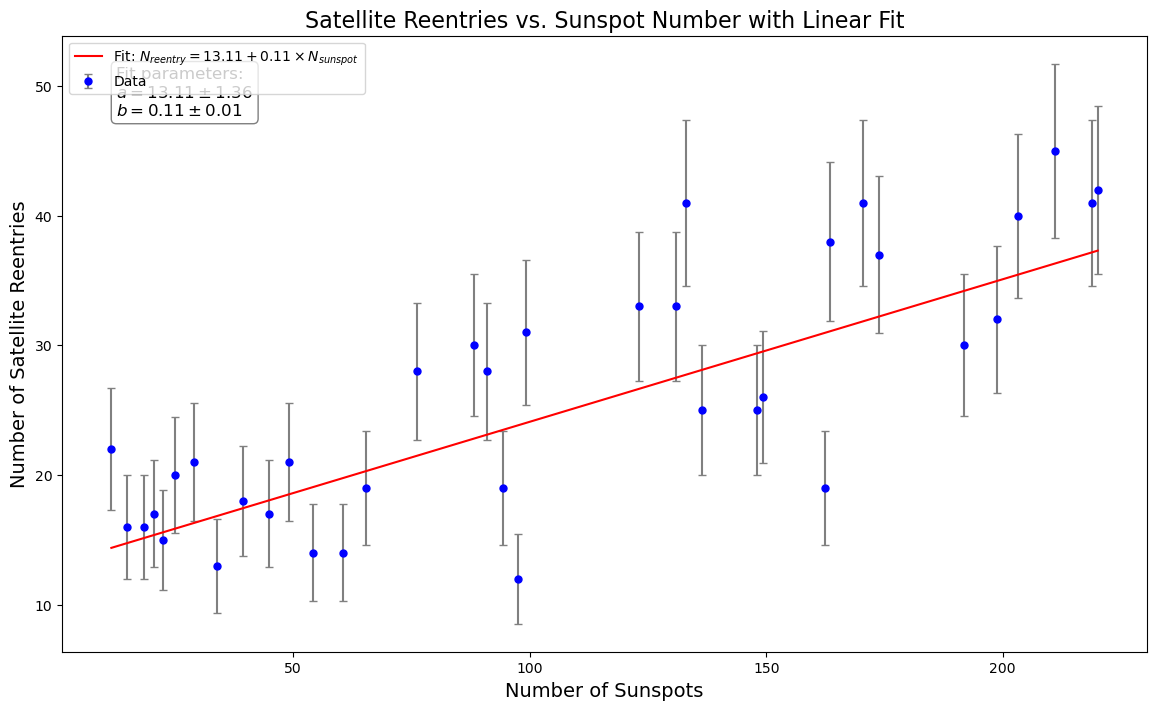

In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Question 2c
def plot_linear_fit(ax, n_sunspots, n_reentries, a, b, cov):
    """Plot the linear fit n_reentries = a + b n_sunspots on the given matplotlib axis.
    """
    # Hints:
    # 1. Plot all the points (n_sunspots, n_reentries) with error bars for n_reentries
    #    based on sigma(N) = sqrt(N)
    # 2. Draw the best linear fit N = a + b T
    # 3. Write the best fit in text on the plot somewhere
    # 4. Don't forget to label your axes.
    
    common_years = n_sunspots.index.intersection(n_reentries.index)
    n_sunspots = n_sunspots[common_years]
    n_reentries = n_reentries[common_years]
    
    # Calculate uncertainties
    sigma_N = np.sqrt(n_reentries)
    
    # Plot the data points with error bars
    ax.errorbar(n_sunspots, n_reentries, yerr=sigma_N, fmt='o', label='Data', markersize=5, color='blue', ecolor='gray', capsize=3)
    
    # Plot the best-fit line
    x_vals = np.linspace(n_sunspots.min(), n_sunspots.max(), 100)
    y_vals = a + b * x_vals
    ax.plot(x_vals, y_vals, label=f'Fit: $N_{{reentry}} = {a:.2f} + {b:.2f} \\times N_{{sunspot}}$', color='red')
    
    # Add text box for fit information
    sigma_a = np.sqrt(cov[0, 0])
    sigma_b = np.sqrt(cov[1, 1])
    ax.text(0.05, 0.95, f'Fit parameters:\n$a = {a:.2f} \\pm {sigma_a:.2f}$\n$b = {b:.2f} \\pm {sigma_b:.2f}$',
            transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # Label axes and title
    ax.set_xlabel('Number of Sunspots', fontsize=14)
    ax.set_ylabel('Number of Satellite Reentries', fontsize=14)
    ax.set_title('Satellite Reentries vs. Sunspot Number with Linear Fit', fontsize=16)
    ax.legend()

fig, ax = plt.subplots(1,1, figsize=(14,8))
plot_linear_fit(ax, n_sunspots, n_reentries, a, b, cov)
plt.show()

In [22]:
# Question 2d

# First a helper function to calculate the chisq value for any proposed values of a,b.
def calculate_chisq(n_sunspots, n_reentries, a, b):
    """Calculate chisq for a given proposed solution (a, b), assumuing var(N) = N.

    chisq = Sum_i (Nr_i - N_fit(Ns_i))^2 / var(Nr_i),
    where N_fit(Ns) = a + b Ns
    
    Returns chisq for the proposed values of a and b.
    """
    common_years = n_sunspots.index.intersection(n_reentries.index)
    n_sunspots = n_sunspots[common_years]
    n_reentries = n_reentries[common_years]
    
    N_fit = a + b * n_sunspots
    
    chisq = np.sum((n_reentries - N_fit)**2 / n_reentries)
    
    return chisq

In [24]:
# Let's check this function at a few values:

# First, the value that we think is the minimum
a, b = fit_reentries_vs_sunspots(n_sunspots, n_reentries)
bestfit_chisq = calculate_chisq(n_sunspots, n_reentries, a, b)
print('chisq at best fit solution = {:.3f}'.format(bestfit_chisq))

# Now a few values a bit shifted from what should be the minimum chisq
chisq1 = calculate_chisq(n_sunspots, n_reentries, a+2, b)
chisq2 = calculate_chisq(n_sunspots, n_reentries, a-2, b)
chisq3 = calculate_chisq(n_sunspots, n_reentries, a, b+0.05)
chisq4 = calculate_chisq(n_sunspots, n_reentries, a, b-0.05)
print('chisq at some nearby values = {:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(chisq1,chisq2,chisq3,chisq4))

# These should all be larger than the best fit chisq
assert chisq1 > bestfit_chisq
assert chisq2 > bestfit_chisq
assert chisq3 > bestfit_chisq
assert chisq4 > bestfit_chisq

# Even a small shift from the best fit should give a slightly larger chisq
chisq5 = calculate_chisq(n_sunspots, n_reentries, a+0.05, b)
chisq6 = calculate_chisq(n_sunspots, n_reentries, a-0.05, b)
chisq7 = calculate_chisq(n_sunspots, n_reentries, a, b+0.001)
chisq8 = calculate_chisq(n_sunspots, n_reentries, a, b-0.001)
print('chisq at some very nearby values = {:.3f}, {:.3f}, {:.3f}, {:.3f}'.format(chisq5,chisq6,chisq7,chisq8))

# These should all still be slightly larger than the best fit chisq
assert chisq5 > bestfit_chisq
assert chisq6 > bestfit_chisq
assert chisq7 > bestfit_chisq
assert chisq8 > bestfit_chisq


chisq at best fit solution = 52.528
chisq at some nearby values = 58.91, 58.91, 97.35, 97.35
chisq at some very nearby values = 52.532, 52.532, 52.546, 52.546


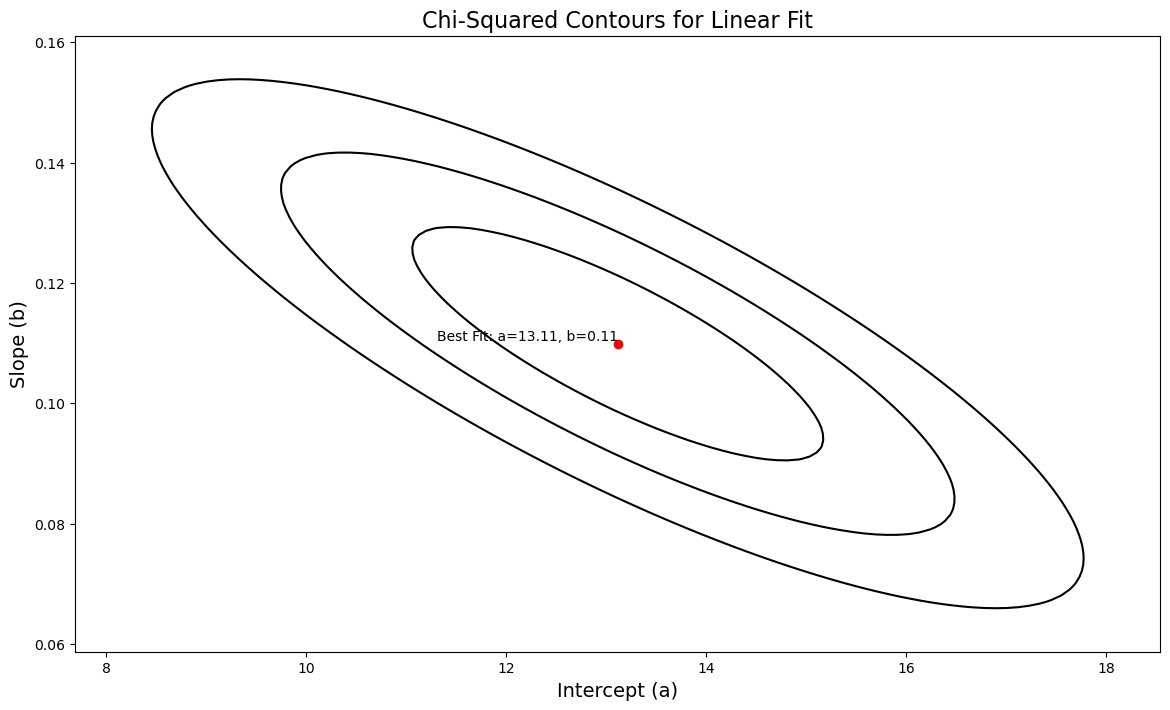

In [26]:
# Question 2d (continued)

# Now we can use the above function to plot chisq values for many a,b values as a contour plot.
def plot_chisq_ellipses(ax, n_sunspots, n_reentries):
    """Plot ellipses at the 1, 2, and 3-sigma contours of a,b
    """
    # Hints: 
    # 1. Use the ax.contour function.
    # 2. Use fit_reentries_vs_sunspots to determine where the center of the plot should be.
    # 3. Use calculate_cov to get an estimate of the two sigmas, so you can have
    #    the ranges of a,b go to about +- 4 sigma in each direction.
    # 4. If your contours look too chunky, try increasing the number of points.
    
    a, b = fit_reentries_vs_sunspots(n_sunspots, n_reentries)
    
    cov = calculate_cov(n_sunspots, n_reentries)
    sigma_a = np.sqrt(cov[0, 0])
    sigma_b = np.sqrt(cov[1, 1])
    
    a_range = np.linspace(a - 4 * sigma_a, a + 4 * sigma_a, 100)
    b_range = np.linspace(b - 4 * sigma_b, b + 4 * sigma_b, 100)
    A, B = np.meshgrid(a_range, b_range)
    
    chisq_values = np.array([[calculate_chisq(n_sunspots, n_reentries, a_val, b_val) for a_val in a_range] for b_val in b_range])
    
    ax.contour(A, B, chisq_values, levels=[calculate_chisq(n_sunspots, n_reentries, a, b) + 2.30,
                                            calculate_chisq(n_sunspots, n_reentries, a, b) + 6.17,
                                            calculate_chisq(n_sunspots, n_reentries, a, b) + 11.8], 
               colors='black', linewidths=1.5)
    
    ax.plot(a, b, 'ro')
    ax.text(a, b, f'Best Fit: a={a:.2f}, b={b:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='right')
    
    ax.set_xlabel('Intercept (a)', fontsize=14)
    ax.set_ylabel('Slope (b)', fontsize=14)
    ax.set_title('Chi-Squared Contours for Linear Fit', fontsize=16)

fig, ax = plt.subplots(1,1, figsize=(14,8))
plot_chisq_ellipses(ax, n_sunspots, n_reentries)
plt.show()

---

**Question 3**

It is common practice in data analysis to demonstrate that your estimator produces unbiased results - i.e., the true parameters values are *on average* recovered.  Do the following to show that your estimators for $a$ and $b$ above are unbiased:

(a) (3 pts) Write a function that draws $N$ points $\{x_i, y_i\}$ from the model,
$$
    y = a + b x
$$
where $x_i$ is drawn from a uniform distribution in the range $[x_{\mathrm{min}}, x_{\mathrm{max}}]$ and $y_i$ is drawn from a Gaussian distribution centered on $y = a + bx_i$ with fixed standard deviation $\sigma$.  Also, write a function that fits for $a, b$ given arrays $x, y$.
  
(b) (3 pts) Using $N=90$, $x_{\mathrm{min}}=18, x_{\mathrm{max}}=38, a=200, b=10$, and $\sigma=10$, generate 10000 realizations of the dataset, determine the inverse-variance-weighted mean values of $\langle a \rangle$ and $\langle b \rangle$, along with their uncertainties $\sigma_{\langle a \rangle}$, $\sigma_{\langle b \rangle}$.  Show that your estimators for $a$ and $b$ are unbiased - i.e, the true value falls within one or two standard deviations from the means of $a$ and $b$.

(c) (2 pts) Plot the histogram of $\chi^2$ values of the 10,000 realization from above, and overplot an appropriately scaled $p(\chi^2; \nu)$ distribution for $\nu=90-2=88$ degrees of freedom.

In [33]:
# Question 3a
def sim_linear(N, xmin, xmax, a, b, sigma):
    """Simulate an experiment with the true relation y = a + b x.
    
    N is the number of data points in the returned arrays.
    xmin, xmax give the range of x values.  The returned x values are uniformly sampled from [xmin, xmax]
    a, b are the true coefficients of the linear relation y = a + b x
    sigma is a constant Gaussian uncertainty of the y values relative to the truth values.

    Returns x, y, both N-element numpy arrays
    """
    # Hint: Use numpy.random.normal for the Gaussian distribution.
    
    x = np.random.uniform(xmin, xmax, N)
    y = a + b * x + np.random.normal(0, sigma, N)
    return x, y

def fit_linear(x, y, sigma):
    """Perform a linear fit y = a + b x, given a constant uncertainty, sigma, of the y values.
    
    Returns a, b, sigma_a, sigma_b
    """
    # Note: Don't use a canned fitting function from scipy, scikit-learn, or other similar package.

    uncertainty = np.zeros_like(x) + sigma
    s = sum(1/uncertainty**2)
    sx = sum(x/(uncertainty**2))
    sxx = sum(x**2/uncertainty**2)
    sy = sum(y/uncertainty**2)
    sxy = sum(x*y/uncertainty**2)

    discriminant = sxx*s-sx**2
    a = (sxx*sy-sx*sxy)/discriminant
    b = (s*sxy-sx*sy)/discriminant
    sigma_a = np.sqrt(sxx/discriminant)
    sigma_b = np.sqrt( s/discriminant)
    return a, b, sigma_a, sigma_b
    

In [35]:
N = 90
xmin = 18
xmax = 38
true_a = 200
true_b = 10
sigma = 10

# Before running a full simulation suite, it's a good idea to check the two ancillary functions
# to make sure they are working correctly.
# Make a single simulation and fit the parameters for it to make sure you get something reasonable.
x, y = sim_linear(N, xmin, xmax, true_a, true_b, sigma)
print('One simulation yielded arrays:')
print('x =',x)
print('y =',y)

assert len(x) == N
assert len(y) == N
assert np.all(x >= xmin)
assert np.all(x <= xmax)

# And check that your fitting function gets something close to the true values.
a, b, siga, sigb = fit_linear(x, y, sigma)
print('The linear fit for this simulation is:')
print('a = {:.3f} +- {:.3f}'.format(a, siga))
print('b = {:.3f} +- {:.3f}'.format(b, sigb))

# These aren't necessarily very close to the true values, but they should be
# vaguely similar.  (We'll check this more precisely in 3b)
assert np.isclose(a, true_a, rtol=0.1)
assert np.isclose(b, true_b, rtol=0.1)

# These aren't techinically *always* true, but the estimated values should almost always be within
# 5 sigma of the true answer.  Indeed >99% of the time, they should be within 3 sigma.
assert abs(a - true_a) < 5*siga
assert abs(b - true_b) < 5*sigb


One simulation yielded arrays:
x = [18.65884918 18.17742834 26.34835411 25.44943106 30.30266661 37.56378481
 29.62185683 28.27129274 20.93201707 26.68803531 23.32048686 35.41526758
 24.5077919  35.92414822 23.80933234 34.35364542 31.31588888 37.25931818
 22.64337674 29.9147395  33.31855619 33.98912153 32.52372748 21.76635044
 24.40458556 29.85707019 23.99495107 19.92527812 31.33172039 30.18308037
 37.98636515 18.75128455 25.95590816 32.61733583 23.96119012 20.91041444
 23.97478072 25.83764938 26.20545757 34.62842249 19.11546321 36.97711137
 34.33048937 22.7749921  26.37561797 32.54078852 30.02212283 34.07550872
 23.31065202 33.07776499 20.01975933 27.94845273 29.29002893 22.01849599
 24.20790911 25.60770132 23.80478875 34.77797307 28.67762947 22.50202812
 28.17641391 24.70551499 30.01873047 21.49770015 33.35615823 37.69902619
 24.74141141 25.78437128 29.56805951 37.08468167 28.68601875 29.03795634
 22.16664606 23.95637178 25.59704085 27.11664672 21.60586392 27.45604429
 31.23691014 36.

In [37]:
# Question 3b
def run_simulation(N, xmin, xmax, true_a, true_b, sigma, Nsim):
    '''
    1. Generates Nsim realizations of the dataset.
    2. Determine the MLE of a, b, sigma_a, sigma_b for 
       each realization
    3. Find the chisq of each realization
    4. Calculate the inverse-variance-weighted mean of
       a and b and the corresponding uncertainties
       for each realiation.
    
    Returns: chisqs, mean_a, mean_b, sig_meana, sig_meanb
    '''
    chisqs = []
    a_values = []
    b_values = []
    sigma_a_values = []
    sigma_b_values = []
    
    # Run Nsim simulations
    for _ in range(Nsim):
        # Generate x values uniformly over [xmin, xmax]
        x = np.random.uniform(xmin, xmax, N)
        
        # Generate y values with Gaussian noise
        y = true_a + true_b * x + np.random.normal(0, sigma, N)
        
        # Fit to find estimates of a, b, sigma_a, sigma_b
        a, b, sigma_a, sigma_b = fit_linear(x, y, sigma)
        
        # Store values
        a_values.append(a)
        b_values.append(b)
        sigma_a_values.append(sigma_a)
        sigma_b_values.append(sigma_b)
        
        # Calculate chi-squared
        y_fit = a + b * x
        chisq = np.sum(((y - y_fit) / sigma) ** 2)
        chisqs.append(chisq)
    
    # Convert lists to arrays for easy calculations
    a_values = np.array(a_values)
    b_values = np.array(b_values)
    sigma_a_values = np.array(sigma_a_values)
    sigma_b_values = np.array(sigma_b_values)
    
    # Calculate inverse-variance-weighted mean and uncertainty for a and b
    weights_a = 1 / sigma_a_values**2
    weights_b = 1 / sigma_b_values**2
    mean_a = np.sum(a_values * weights_a) / np.sum(weights_a)
    mean_b = np.sum(b_values * weights_b) / np.sum(weights_b)
    sig_meana = np.sqrt(1 / np.sum(weights_a))
    sig_meanb = np.sqrt(1 / np.sum(weights_b))
    
    return np.array(chisqs), mean_a, mean_b, sig_meana, sig_meanb

In [39]:
N = 90
xmin = 18
xmax = 38
true_a = 200
true_b = 10
sigma = 10
Nsim = 10000

chisqs, mean_a, mean_b, sig_meana, sig_meanb = run_simulation(N, xmin, xmax, true_a, true_b, sigma, Nsim)

print('True a, b = ', true_a, true_b)

print('Inverse-variance-weighted mean of sims:')
print('   a = {:.5f} +- {:.5f}'.format(mean_a, sig_meana))
print('   b = {:.5f} +- {:.5f}'.format(mean_b, sig_meanb))

assert len(chisqs) == Nsim

print('Mean chisq of simulations is {:.2f}'.format(np.mean(chisqs)))

# Now our estimates should be much more precise.
assert np.isclose(mean_a, true_a, rtol=1.e-3)
assert np.isclose(mean_b, true_b, rtol=1.e-3)

assert abs(mean_a - true_a) < 5*sig_meana
assert abs(mean_b - true_b) < 5*sig_meanb


True a, b =  200 10
Inverse-variance-weighted mean of sims:
   a = 199.98498 +- 0.05241
   b = 10.00003 +- 0.00183
Mean chisq of simulations is 87.89


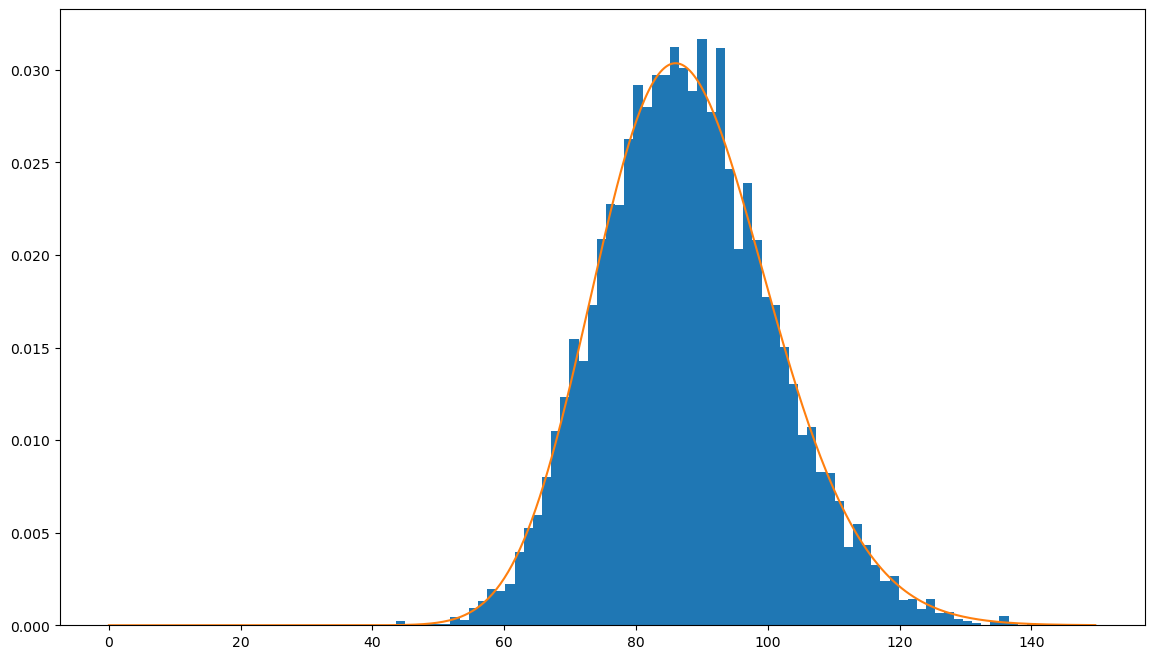

In [43]:
import scipy.stats

# Question 3c
def plot_chisq_hist(ax, chisq, nu):
    '''Plots a histogram of chisq values
    Also overplots a chisq distribution for nu degrees of freedom.
    '''
    # Hint: See the pdf method of scipy.stats.chi2.
    
    ax.hist(chisq, bins=70, density=True)
    x_vals = np.arange(0, 150, 0.3)
    y_vals = scipy.stats.chi2.pdf(x_vals, df=nu)
    ax.plot(x_vals, y_vals)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
plot_chisq_hist(ax, chisqs, N-2)
plt.show()